In [91]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#d = pickle.load(open("dict2pR/dict_rand_7.pkl", "rb"))

In [161]:
seedsP = list(range(6,11))+[22,23,25,26,27]+list(range(30,35))+list(range(36,40))+list(range(42,54))+list(range(55,60))

In [162]:
dirr = ["dict2p", "dict2pR"]
def get_e(dictdir, kind):
    e1 = {}
    e2 = {}
    sigma ={}
    label = ['e1','e2','sigma']
    item = [e1,e2,sigma]
    for j in seeds:
        data = pickle.load(open(dictdir+"/dict_"+kind+"_"+str(j)+".pkl", "rb"))
        for i in range(3):
            item[i][j] = [data[label[i]]['g1'][0],data[label[i]]['g2'][0]]

    e1 = pd.DataFrame(e1, index=["e1_g1","e1_g2"]).T
    e2 = pd.DataFrame(e2, index=["e2_g1","e2_g2"]).T
    sigma = pd.DataFrame(sigma, index=["sigma_g1","sigma_g2"]).T
    e = pd.concat([e1,e2,sigma], axis=1)
    return e

eP = get_e(dirr[0], "psfws")
eR = get_e(dirr[1], "rand")

In [163]:
eR

,e1_g1,e1_g2,e2_g1,e2_g2,sigma_g1,sigma_g2
6,0.031068,1.822846e-01,0.208763,1.763394e-01,0.055404,0.186995
7,0.330459,1.638373e-01,0.080550,2.594895e-01,0.214058,0.263693
8,0.365142,4.653140e-01,0.466761,7.730559e-02,0.444420,-0.292468
9,-0.101489,-2.962357e-02,0.005279,-4.679938e-02,-0.146849,-0.031932
10,0.288190,-7.690737e-02,0.088358,-1.048819e-01,0.372657,-0.009269
22,0.247361,-1.415268e-02,-0.094702,1.910175e-02,0.224966,-0.048496
23,-0.214892,-3.778566e-02,-0.010851,-1.599501e-01,-0.209505,-0.160822
25,0.995143,4.922132e-02,0.168424,-2.308823e-01,-0.147974,-0.051346
26,-0.303317,-1.046115e-01,-0.520107,-9.615359e-02,-0.340598,-0.096748
27,0.304708,-8.227500e-02,-0.259942,1.984328e-01,-0.304048,0.156162


Text(0, 0.5, 'g2 rand')

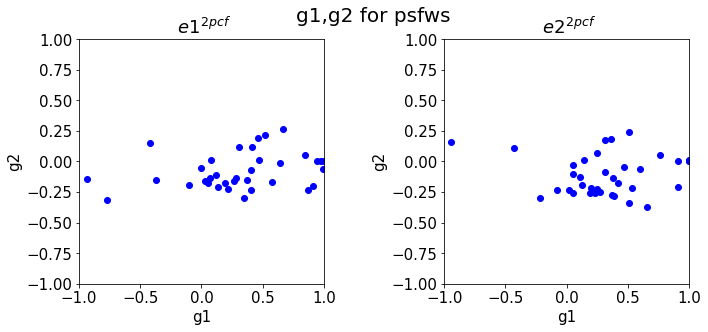

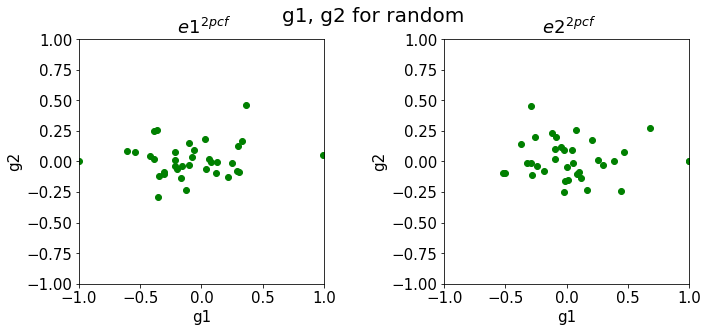

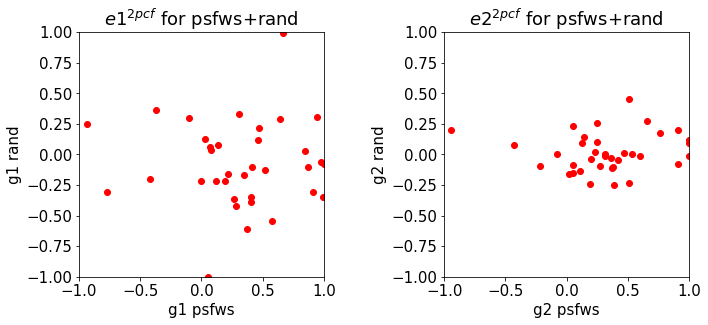

In [172]:
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
def plotplot(coord0, coord1, figtitle, axti, color, axlabel):
    fig, ax = plt.subplots(1,2, figsize=(12,4.5),sharex=True)
    ax[0].scatter(coord0[0], coord0[1], c=color)
    ax[1].scatter(coord1[0], coord1[1], c= color)
    [a.set_xlabel(axlabel[0]) for a in ax]
    [a.set_ylabel(axlabel[1]) for a in ax]
    fig.suptitle(figtitle, size=20)
    ax[0].set_title(axti[0])
    ax[1].set_title(axti[1])
    [a.set_xlim(-1,1) for a in ax]
    [a.set_ylim(-1,1) for a in ax]
    [a.set_aspect('equal') for a in ax]
    return fig,ax

# e1, e2 scatter psfws
fig1, ax1 = plotplot([eP['e1_g1'], eP["e1_g2"]],[eP['e2_g1'], eP["e2_g2"]],
         "g1,g2 for psfws", 
         [" $e1^{2pcf}$"," $e2^{2pcf}$"], "b", ["g1","g2"])

# e1, e2 scatter rand
fig2, ax2 = plotplot([eR['e1_g1'], eR["e1_g2"]],[eR['e2_g1'], eR["e2_g2"]],
         "g1, g2 for random", 
         [" $e1^{2pcf}$"," $e2^{2pcf}$"],"g", ["g1","g2"]) 

# e1, e1 scatter psfws + rand
fig3, ax3  = plotplot([eP['e1_g1'], eR["e1_g1"]],[eP['e2_g1'], eR["e2_g2"]],
         "", 
         ["$e1^{2pcf}$ for psfws+rand","$e2^{2pcf}$ for psfws+rand"],"r", ["g1","g2"])
ax3[0].set_xlabel("g1 psfws")
ax3[0].set_ylabel("g1 rand")
ax3[1].set_xlabel("g2 psfws")
ax3[1].set_ylabel("g2 rand")
